In [ ]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [18]:
price = data['price'].values.reshape(-1,1)

In [19]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
iters = 1000
rate = 0.01

In [22]:
model = MLPRegressor(hidden_layer_sizes=(512,),max_iter=iters,learning_rate_init=rate,activation='relu',solver='adam',verbose=True,batch_size=16)
history = model.fit(X_train,y_train)

Iteration 1, loss = 12910956549060.01367188
Iteration 2, loss = 12910382186322.90234375
Iteration 3, loss = 12908721254106.72265625
Iteration 4, loss = 12905513434270.47265625
Iteration 5, loss = 12900751419081.83398438
Iteration 6, loss = 12894238453484.20117188
Iteration 7, loss = 12886001081590.60156250
Iteration 8, loss = 12876095229492.79882812
Iteration 9, loss = 12864480340797.84570312
Iteration 10, loss = 12851436894988.11718750


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1771: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 11, loss = 12836228571222.16796875
Iteration 12, loss = 12820038941118.97070312
Iteration 13, loss = 12801510064646.71093750
Iteration 14, loss = 12781804487970.28515625
Iteration 15, loss = 12760290361127.63281250
Iteration 16, loss = 12737255691658.18554688
Iteration 17, loss = 12712907739160.70898438
Iteration 18, loss = 12686601642231.14648438
Iteration 19, loss = 12658965390379.21875000
Iteration 20, loss = 12630441961969.33398438
Iteration 21, loss = 12599625209158.33789062
Iteration 22, loss = 12567706518152.43554688
Iteration 23, loss = 12534238801291.71679688
Iteration 24, loss = 12499556095345.36132812
Iteration 25, loss = 12463137047159.43359375
Iteration 26, loss = 12425562258109.66601562
Iteration 27, loss = 12386683259801.30664062
Iteration 28, loss = 12346345917302.06835938
Iteration 29, loss = 12305726984917.77929688
Iteration 30, loss = 12261911985928.83007812
Iteration 31, loss = 12218370826409.26757812
Iteration 32, loss = 12173657000520.68164062
Iteration 

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


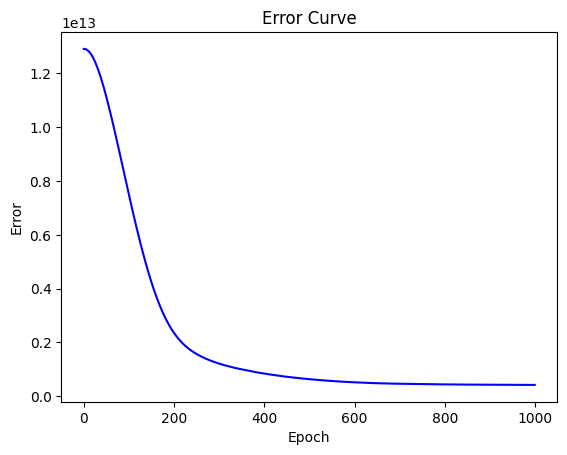

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.loss_curve_, alpha=1.0, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Curve')
plt.show()

In [24]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

def evaluate_modelp(model, X, y):
    y_pred = model.predict(X)
    mse = mean_absolute_percentage_error(y, y_pred)
    return mse

In [25]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train:.4f}')

mse_test = evaluate_model(model, X_test, y_test)
print(f'Test MSE: {mse_test:.4f}')

mse_test = evaluate_modelp(model, X_test, y_test)
print(f'Test Percentage Error: {mse_test*100:.4f}')

Training MSE: 842960421120.1027
Test MSE: 1342499601254.4897
Test Percentage Error: 20.2705


In [26]:
y_test_pred = model.predict(X_test)

In [27]:
pltYTestPred = []
pltYTest = []
testChange = []

In [28]:
for i in range(len(y_test_pred)):
  pltYTestPred.append(y_test_pred[i])
  pltYTest.append(y_test[i][0])
  testChange.append(y_test_pred[i] - y_test[i][0])

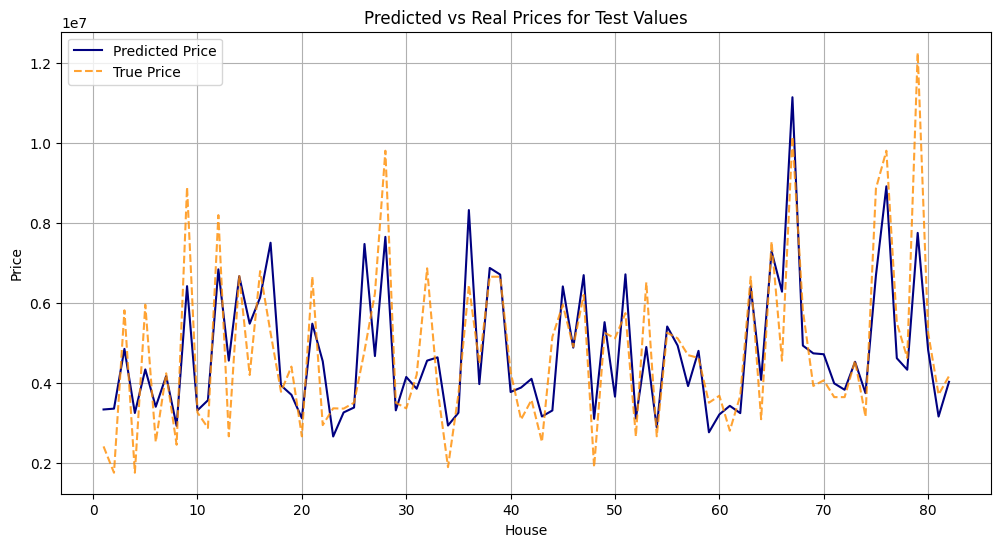

In [29]:
plt.figure(figsize=(12, 6))
plt.title("Predicted vs Real Prices for Test Values")
plt.xlabel("House")
plt.ylabel("Price")
testRange = range(1, len(pltYTestPred)+1)
plt.plot(testRange, pltYTestPred, label="Predicted Price", color="navy")

plt.plot(testRange, pltYTest, label="True Price",
             color="darkorange", linestyle="--", alpha=0.8)

plt.legend(loc="best")
plt.grid(True)
plt.show()

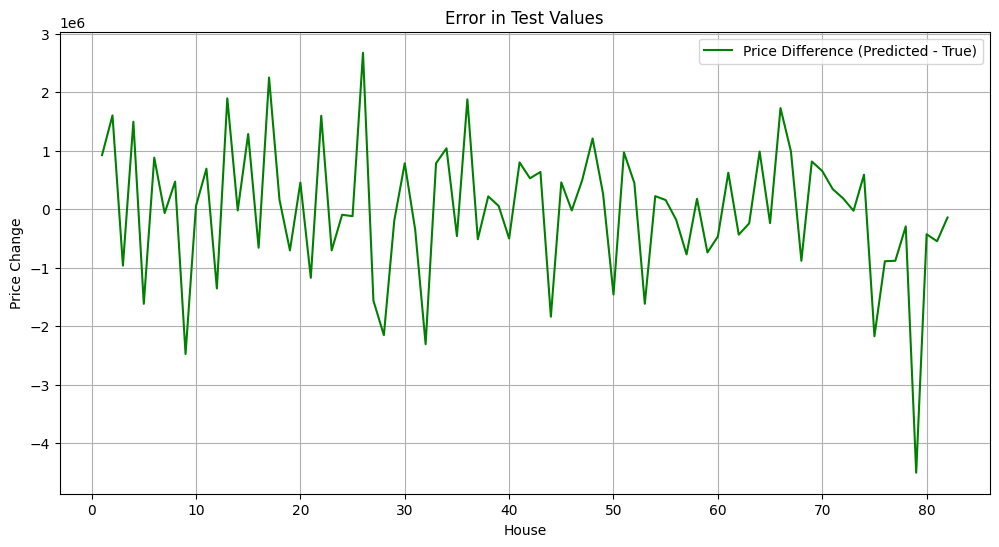

In [30]:
plt.figure(figsize=(12, 6))
plt.title("Error in Test Values")
plt.xlabel("House")
plt.ylabel("Price Change")

plt.plot(testRange, testChange, label="Price Difference (Predicted - True)",
             color="green")

plt.legend(loc="best")
plt.grid(True)
plt.show()